#A Breakdown of Comp Attendance and Success

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 
import pickle
import numpy as np
import pandas as pd
import tbapy

In [2]:
event_code = "2017alhu"

In [3]:
tba = tbapy.TBA('w4sdTrGh4f4ueC0pfm5ZceCZp3yM3I0SRsJLrn1oblRowvr3Zx2UbcXQpaWnZSpK')

teams = tba.event_teams(event_code)
i = 0
while i < len(teams):
    teams[i] = teams[i].json
    i+=1

teams = pd.DataFrame(teams)

team_info = []
for i in teams.key:
    team_info.append(tba.team(i).json)
alldata = pd.DataFrame(team_info)
data = alldata

data = data.drop('website', axis=1)
data = data.drop('state_prov', axis=1)
data = data.drop('postal_code', axis=1)
data = data.drop('nickname', axis=1)
data = data.drop('name', axis=1)
data = data.drop('motto', axis=1)
data = data.drop('location_name', axis=1)
data = data.drop('lng', axis=1)
data = data.drop('lat', axis=1)
data = data.drop('home_championship', axis=1)
data = data.drop('gmaps_url', axis=1)
data = data.drop('gmaps_place_id', axis=1)
data = data.drop('country', axis=1)
data = data.drop('city', axis=1)
data = data.drop('address', axis=1)

data = data.set_index('key')

opr = tba.event_oprs(event_code)
opr = opr.json
opr = pd.DataFrame(opr)


data = data.join(opr)

In [4]:
finals = tba.event_alliances(event_code)
final_picks = []
for i in finals:
    final_picks.append(i.picks)
final_picks = [item for sublist in final_picks for item in sublist]

data['final'] = data.index.isin(final_picks)

In [5]:
team_events = []

for i in data.index:
    events = []
    tb_events = tba.team_events(i)
    for e in tb_events:
        events.append(e.json)
    team_events.append(events)

yearly_events = []
for i in team_events:
    events = []
    for p in i:
        if p['year'] == 2017 and (p['event_type'] == 0 or p['event_type'] == 1):
            events.append(p)
    yearly_events.append(events)
team_events = yearly_events

count = []
for i in team_events:
    count.append(len(i))

data['num_comps'] = count
data['rookie_year'] = 2017 - data['rookie_year']

In [6]:
alabama_data = data
event_code = "2017tnkn"

In [7]:
teams = tba.event_teams(event_code)
i = 0
while i < len(teams):
    teams[i] = teams[i].json
    i+=1

teams = pd.DataFrame(teams)

team_info = []
for i in teams.key:
    team_info.append(tba.team(i).json)
alldata = pd.DataFrame(team_info)
data = alldata

data = data.drop('website', axis=1)
data = data.drop('state_prov', axis=1)
data = data.drop('postal_code', axis=1)
data = data.drop('nickname', axis=1)
data = data.drop('name', axis=1)
data = data.drop('motto', axis=1)
data = data.drop('location_name', axis=1)
data = data.drop('lng', axis=1)
data = data.drop('lat', axis=1)
data = data.drop('home_championship', axis=1)
data = data.drop('gmaps_url', axis=1)
data = data.drop('gmaps_place_id', axis=1)
data = data.drop('country', axis=1)
data = data.drop('city', axis=1)
data = data.drop('address', axis=1)

data = data.set_index('key')

opr = tba.event_oprs(event_code)
opr = opr.json
opr = pd.DataFrame(opr)


data = data.join(opr)
finals = tba.event_alliances(event_code)
final_picks = []
for i in finals:
    final_picks.append(i.picks)
final_picks = [item for sublist in final_picks for item in sublist]

data['final'] = data.index.isin(final_picks)
team_events = []

for i in data.index:
    events = []
    tb_events = tba.team_events(i)
    for e in tb_events:
        events.append(e.json)
    team_events.append(events)

yearly_events = []
for i in team_events:
    events = []
    for p in i:
        if p['year'] == 2017 and (p['event_type'] == 0 or p['event_type'] == 1):
            events.append(p)
    yearly_events.append(events)
team_events = yearly_events

count = []
for i in team_events:
    count.append(len(i))

data['num_comps'] = count
data['rookie_year'] = 2017 - data['rookie_year']

##Full Data Breakdown of Rocket City Regonal

In [8]:
data

rookie_year  team_number      ccwms        dprs        oprs  final  \
key                                                                           
frc108            22          108  34.406191   54.900779   89.306969   True   
frc1287           13         1287  24.375298   73.834942   98.210240   True   
frc1466           13         1466  40.304779   59.590579   99.895359   True   
frc1876           11         1876  60.811768   46.726476  107.538244   True   
frc2393            9         2393  49.066346   53.051534  102.117880   True   
frc2641            9         2641  57.021615   62.871190  119.892805   True   
frc279            18          279  -3.062326   88.030324   84.967998  False   
frc3000            8         3000  18.013532   87.087084  105.100616   True   
frc3140            7         3140   1.594756  105.563825  107.158582   True   
frc3259            7         3259 -30.813660   68.272479   37.458819  False   
frc337            17          337  -5.234894  105.744937  100.510043   True   
frc342            17          342  27.620684   79.258530  106.879214   True   
frc3489            6         3489   9.956939  105.551009  115.507949   True   
frc3821            6         3821 -44.806175   89.111490   44.305315  False   
frc3824            6         3824  45.473603   73.447426  118.921028   True   
frc3843            6         3843  15.036455   57.659156   72.695611  False   
frc3844            6         3844 -61.012349   99.528036   38.515687  False   
frc3966            5         3966   2.864072   83.666806   86.530879  False   
frc3984            5         3984   7.805032   48.584496   56.389528  False   
frc4020            5         4020  23.081222   94.591384  117.672607   True   
frc4098            5         4098 -39.586966   85.924397   46.337432  False   
frc4264            5         4264   6.171957   74.839591   81.011548   True   
frc4265            5         4265  13.845635   67.838803   81.684437   True   
frc4306            5         4306 -21.266632   70.114952   48.848320  False   
frc4462            4         4462  17.785117   86.663969  104.449086   True   
frc4504            4         4504  -1.883215   83.071686   81.188471  False   
frc4521            4         4521 -24.167797   50.369903   26.202106  False   
frc4533            4         4533  -3.901141   47.812546   43.911406   True   
frc4576            4         4576  25.431030   74.351996   99.783026   True   
frc4630            4         4630 -18.630696   61.449506   42.818810  False   
frc48             19           48  -9.304408  104.338823   95.034414   True   
frc5002            3         5002  29.559106   57.760451   87.319558  False   
frc5022            3         5022 -22.158675   87.788239   65.629564  False   
frc5186            3         5186 -87.347165  106.710539   19.363374  False   
frc5423            2         5423 -47.164629   87.361456   40.196827  False   
frc5492            2         5492  45.079703   71.941776  117.021479   True   
frc5508            2         5508  13.586080   79.095405   92.681485   True   
frc5744            2         5744 -36.656113   79.082111   42.425998  False   
frc5816            1         5816  21.645096   41.552801   63.197896   True   
frc6105            1         6105 -48.678054   81.522456   32.844402  False   
frc6157            1         6157 -47.661902   70.946018   23.284116  False   
frc6219            1         6219 -28.482730   96.327647   67.844917  False   
frc63             20           63  36.588280   58.481177   95.069458  False   
frc6302            0         6302 -44.426784   76.165992   31.739207  False   
frc6517            0         6517   8.923232   64.781822   73.705054  False   
frc6654            0         6654 -37.052937   57.390396   20.337460  False   
frc744            15          744  25.285505   76.211573  101.497078   True   
frc801            15          801   1.966214   87.331484   89.297699   True   

         num_comps  
key                 
frc108          

##A Breakdown of Main Stats

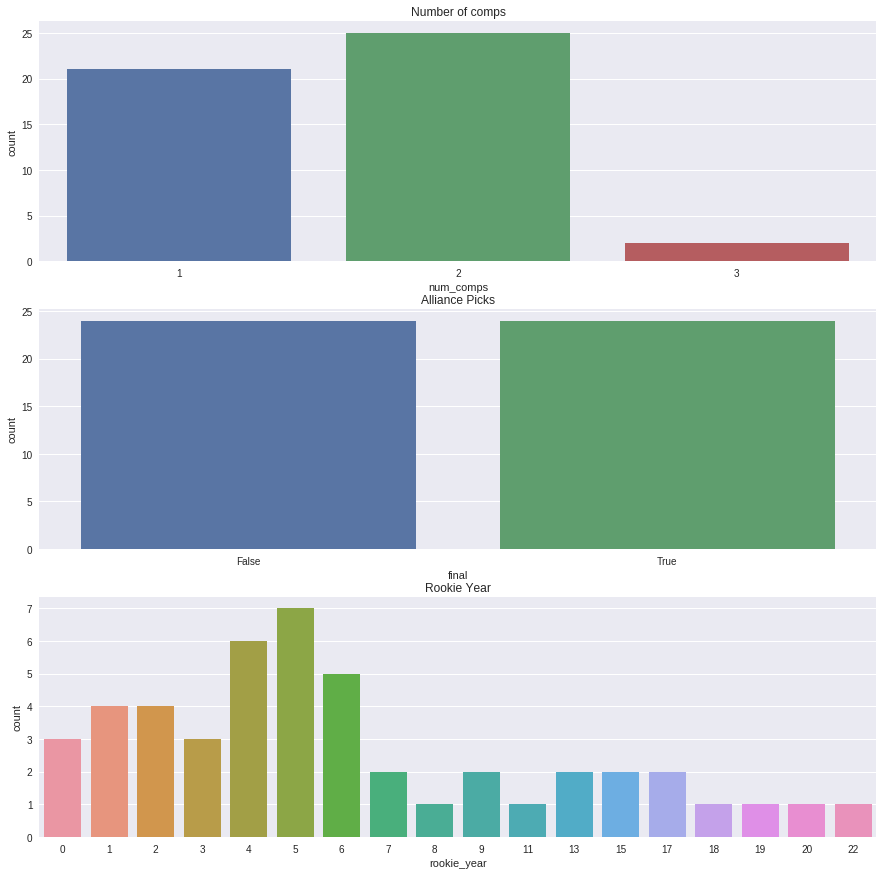

In [9]:
#ax = plt.axes()

f, axarr = plt.subplots(3, 1, figsize=(15, 15))
sns.countplot(x='num_comps', data=data, ax=axarr[0])
sns.countplot(x='final', data=data, ax=axarr[1])
sns.countplot(x='rookie_year', data=data, ax=axarr[2])

axarr[0].set_title('Number of comps')
axarr[1].set_title('Alliance Picks')
axarr[2].set_title('Rookie Year')

#plt.tight_layout()
plt.show()

##All Stat Correlation
Notice: rookie_year and num_comps should be considered cause, and oprs, dprs, ccwms, and alliance picks should be considered Effect

Also: When the X and Y labels of a plot are the same it just does a distribution chart like above

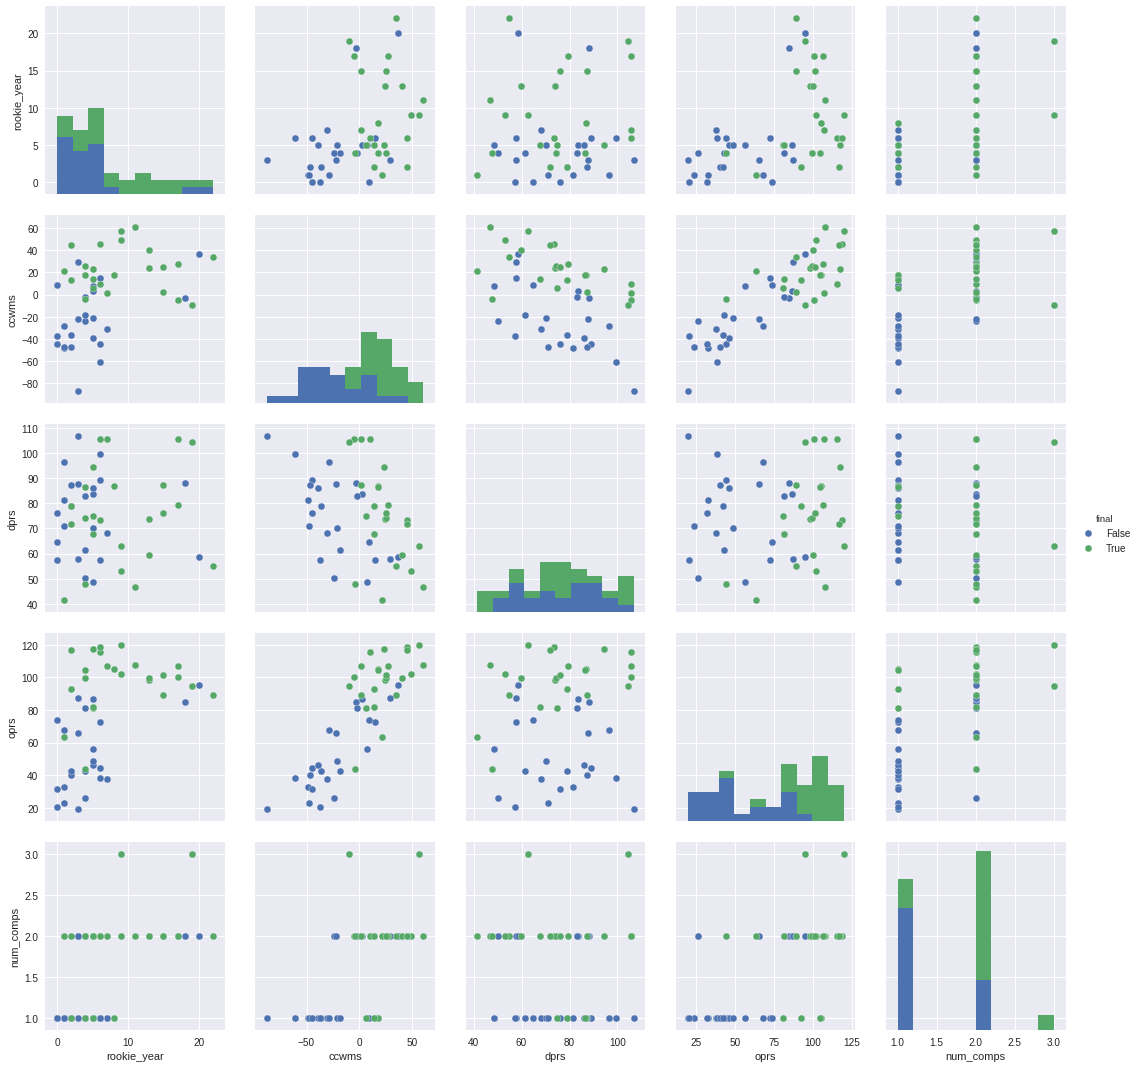

In [10]:
sns.pairplot(data, vars=['rookie_year', 'ccwms', 'dprs', 'oprs', 'num_comps'], hue='final', size=3)
plt.show()

In [16]:
alabama_data

rookie_year  team_number      ccwms        dprs        oprs  final  \
key                                                                           
frc1108           14         1108   5.789747   53.275875   59.065622   True   
frc1319           13         1319  35.263273   70.525944  105.789217   True   
frc1369           13         1369 -49.985213  113.539974   63.554761   True   
frc1539           12         1539   8.320091   63.549714   71.869805  False   
frc1706           12         1706  53.251003   35.431500   88.682503   True   
frc1758           11         1758  46.170430   40.993081   87.163511  False   
frc179            19          179  41.580995   63.573380  105.154375   True   
frc180            19          180  77.681025   50.043617  127.724641   True   
frc2010           10         2010  32.948958   73.567846  106.516803   True   
frc2016           10         2016  21.802871   60.617206   82.420077   True   
frc2386            9         2386 -13.929417   68.420585   54.491168  False   
frc2556            9         2556  -2.909743   72.206599   69.296856   True   
frc2783            8         2783  19.268521   57.562087   76.830608   True   
frc2815            8         2815  -9.600416   73.350113   63.749697   True   
frc2973            8         2973 -38.936088   66.834608   27.898521  False   
frc3139            7         3139 -10.327410   61.324777   50.997366  False   
frc3319            7         3319 -27.536583   91.494422   63.957839  False   
frc34             20           34  14.060320   72.093866   86.154187   True   
frc343            17          343   9.763850   98.653576  108.417427   True   
frc3490            6         3490  36.267955   57.950229   94.218184   True   
frc3814            6         3814  63.693065   41.376226  105.069291   True   
frc3861            6         3861 -16.901175   57.412792   40.511618  False   
frc3959            5         3959  50.036635   47.444635   97.481270   True   
frc4013            5         4013 -27.375872   58.234309   30.858437  False   
frc4256            5         4256  -6.667874   75.746506   69.078632   True   
frc442            17          442 -33.825870   70.265154   36.439283  False   
frc4451            4         4451  90.231128   31.147391  121.378519   True   
frc4471            4         4471  15.488831   35.185567   50.674398  False   
frc4707            4         4707 -51.256995   81.136879   29.879884  False   
frc4740            4         4740 -75.091326   90.690166   15.598840  False   
frc4924            3         4924   0.778301   67.576950   68.355251  False   
frc4965            3         4965  22.431190   51.889037   74.320227   True   
frc5005            3         5005 -19.312262   85.832537   66.520275  False   
frc5045            3         5045 -35.995811   79.330345   43.334533  False   
frc5058            3         5058 -30.773627   64.169931   33.396305  False   
frc538            16          538 -30.729668   94.023582   63.293914  False   
frc547            16          547 -31.536603   80.124422   48.587820  False   
frc5551            2         5551 -16.376514   48.280425   31.903911  False   
frc5616            2         5616 -17.593057   73.220751   55.627694  False   
frc5721            2         5721   2.028332   70.942498   72.970830  False   
frc5842            1         5842  -0.309981   95.583936   95.273954   True   
frc5845            1         5845 -25.914234   83.193246   57.279012  False   
frc5858            1         5858 -26.032999   83.235707   57.202708  False   
frc6055            1         6055   1.812512   69.838422   71.650934   True   
frc6107            1         6107 -30.156147   53.098601   22.942453  False   
frc6366            0         6366  -1.526362   87.146125   85.619763   True   
frc6373            0         6373 -51.069428   79.505637   28.436209  False   
frc6396            0         6396   7.320255   59.431064   66.751318   True   
frc6491            0         6491   2.143642   51.738627   

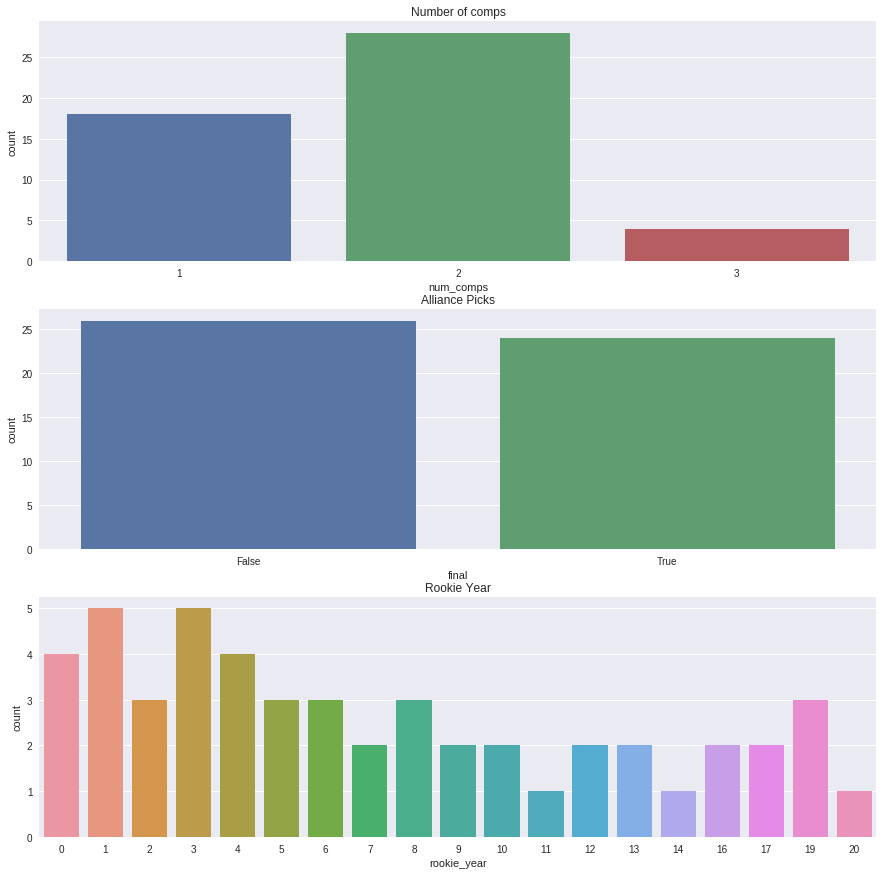

In [17]:
#ax = plt.axes()

f, axarr = plt.subplots(3, 1, figsize=(15, 15))
sns.countplot(x='num_comps', data=alabama_data, ax=axarr[0])
sns.countplot(x='final', data=alabama_data, ax=axarr[1])
sns.countplot(x='rookie_year', data=alabama_data, ax=axarr[2])

axarr[0].set_title('Number of comps')
axarr[1].set_title('Alliance Picks')
axarr[2].set_title('Rookie Year')

#plt.tight_layout()
plt.show()

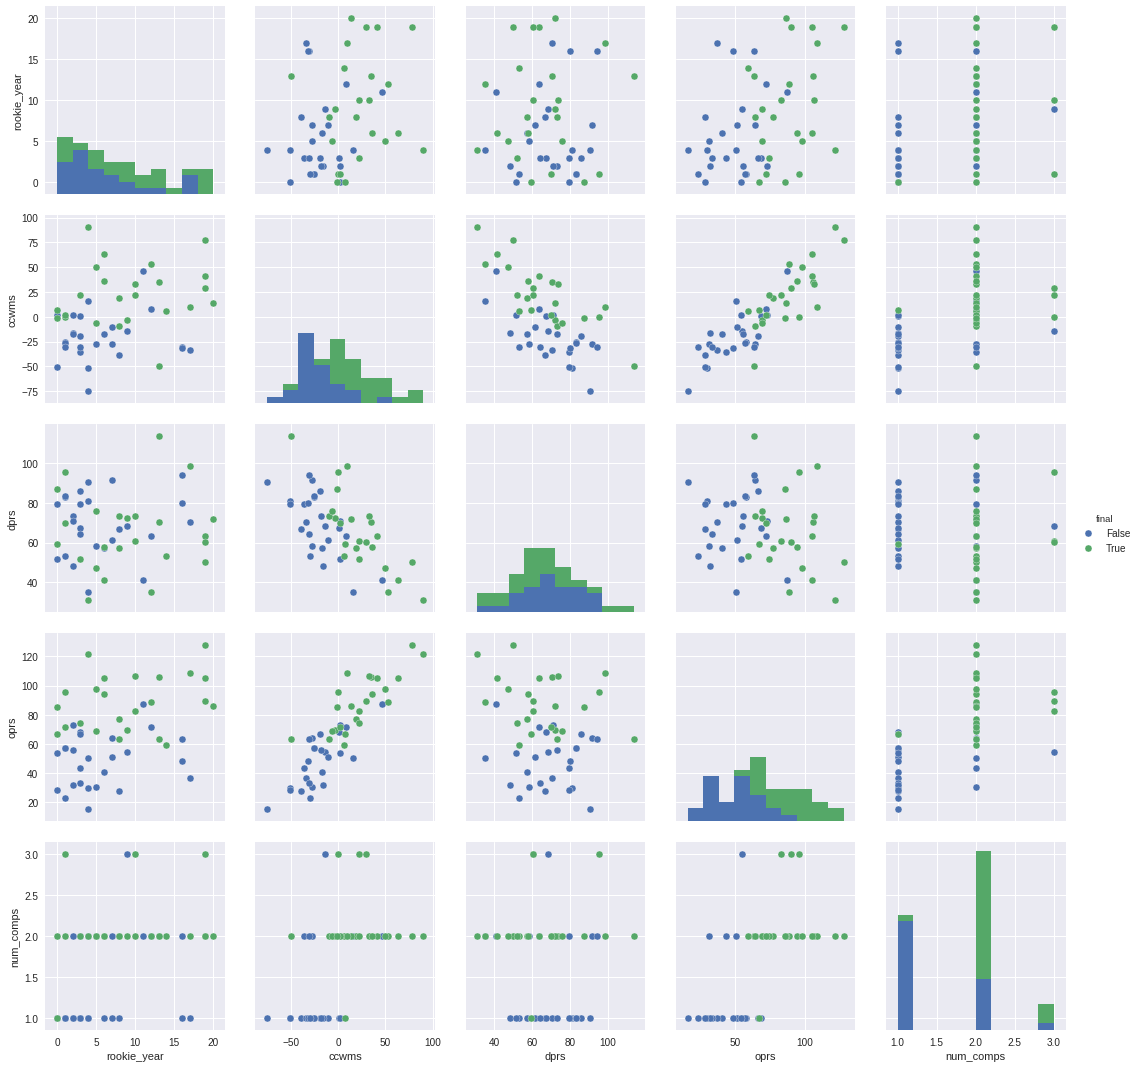

In [18]:
sns.pairplot(alabama_data, vars=['rookie_year', 'ccwms', 'dprs', 'oprs', 'num_comps'], hue='final', size=3)
plt.show()

In [12]:
all_data = data.append(alabama_data)

In [13]:
all_data

rookie_year  team_number      ccwms        dprs        oprs  final  \
key                                                                           
frc108            22          108  34.406191   54.900779   89.306969   True   
frc1287           13         1287  24.375298   73.834942   98.210240   True   
frc1466           13         1466  40.304779   59.590579   99.895359   True   
frc1876           11         1876  60.811768   46.726476  107.538244   True   
frc2393            9         2393  49.066346   53.051534  102.117880   True   
frc2641            9         2641  57.021615   62.871190  119.892805   True   
frc279            18          279  -3.062326   88.030324   84.967998  False   
frc3000            8         3000  18.013532   87.087084  105.100616   True   
frc3140            7         3140   1.594756  105.563825  107.158582   True   
frc3259            7         3259 -30.813660   68.272479   37.458819  False   
frc337            17          337  -5.234894  105.744937  100.510043   True   
frc342            17          342  27.620684   79.258530  106.879214   True   
frc3489            6         3489   9.956939  105.551009  115.507949   True   
frc3821            6         3821 -44.806175   89.111490   44.305315  False   
frc3824            6         3824  45.473603   73.447426  118.921028   True   
frc3843            6         3843  15.036455   57.659156   72.695611  False   
frc3844            6         3844 -61.012349   99.528036   38.515687  False   
frc3966            5         3966   2.864072   83.666806   86.530879  False   
frc3984            5         3984   7.805032   48.584496   56.389528  False   
frc4020            5         4020  23.081222   94.591384  117.672607   True   
frc4098            5         4098 -39.586966   85.924397   46.337432  False   
frc4264            5         4264   6.171957   74.839591   81.011548   True   
frc4265            5         4265  13.845635   67.838803   81.684437   True   
frc4306            5         4306 -21.266632   70.114952   48.848320  False   
frc4462            4         4462  17.785117   86.663969  104.449086   True   
frc4504            4         4504  -1.883215   83.071686   81.188471  False   
frc4521            4         4521 -24.167797   50.369903   26.202106  False   
frc4533            4         4533  -3.901141   47.812546   43.911406   True   
frc4576            4         4576  25.431030   74.351996   99.783026   True   
frc4630            4         4630 -18.630696   61.449506   42.818810  False   
...              ...          ...        ...         ...         ...    ...   
frc3814            6         3814  63.693065   41.376226  105.069291   True   
frc3861            6         3861 -16.901175   57.412792   40.511618  False   
frc3959            5         3959  50.036635   47.444635   97.481270   True   
frc4013            5         4013 -27.375872   58.234309   30.858437  False   
frc4256            5         4256  -6.667874   75.746506   69.078632   True   
frc442            17          442 -33.825870   70.265154   36.439283  False   
frc4451            4         4451  90.231128   31.147391  121.378519   True   
frc4471            4         4471  15.488831   35.185567   50.674398  False   
frc4707            4         4707 -51.256995   81.136879   29.879884  False   
frc4740            4         4740 -75.091326   90.690166   15.598840  False   
frc4924            3         4924   0.778301   67.576950   68.355251  False   
frc4965            3         4965  22.431190   51.889037   74.320227   True   
frc5005            3         5005 -19.312262   85.832537   66.520275  False   
frc5045            3         5045 -35.995811   79.330345   43.334533  False   
frc5058            3         5058 -30.773627   64.169931   33.396305  False   
frc538            16          538 -30.729668   94.023582   63.293914  False   
frc547            16          547 -31.536603   80.124422   48.587820  False   
frc5551            2         5551 -16.376514   48.280425   

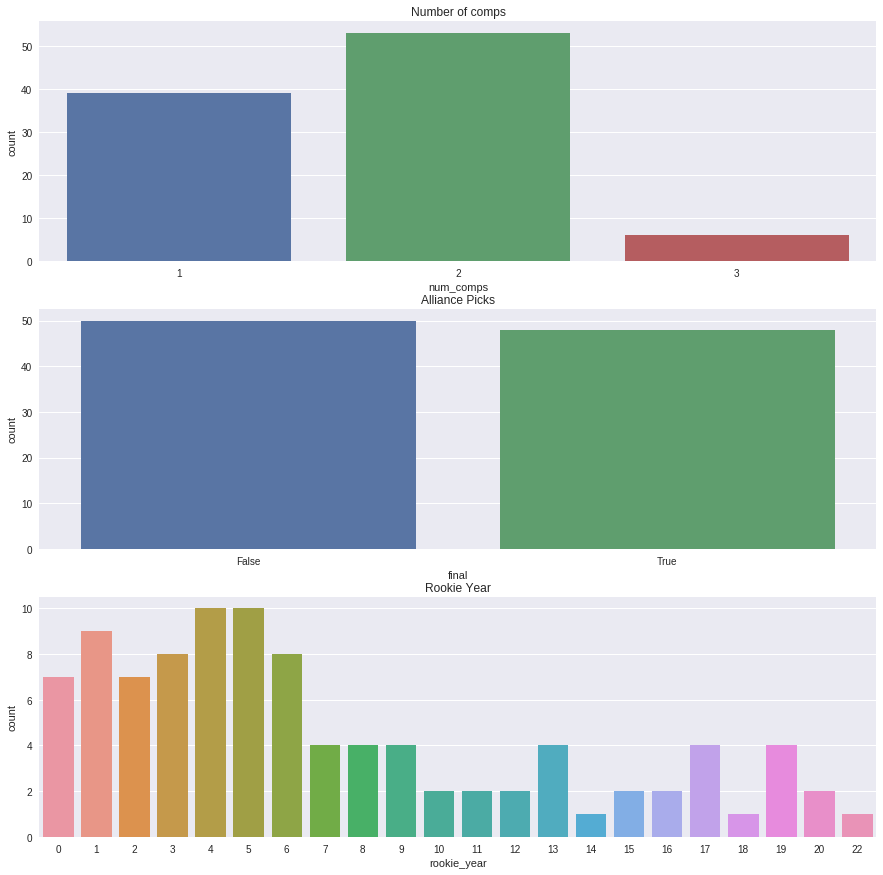

In [14]:
#ax = plt.axes()

f, axarr = plt.subplots(3, 1, figsize=(15, 15))
sns.countplot(x='num_comps', data=all_data, ax=axarr[0])
sns.countplot(x='final', data=all_data, ax=axarr[1])
sns.countplot(x='rookie_year', data=all_data, ax=axarr[2])

axarr[0].set_title('Number of comps')
axarr[1].set_title('Alliance Picks')
axarr[2].set_title('Rookie Year')

#plt.tight_layout()
plt.show()

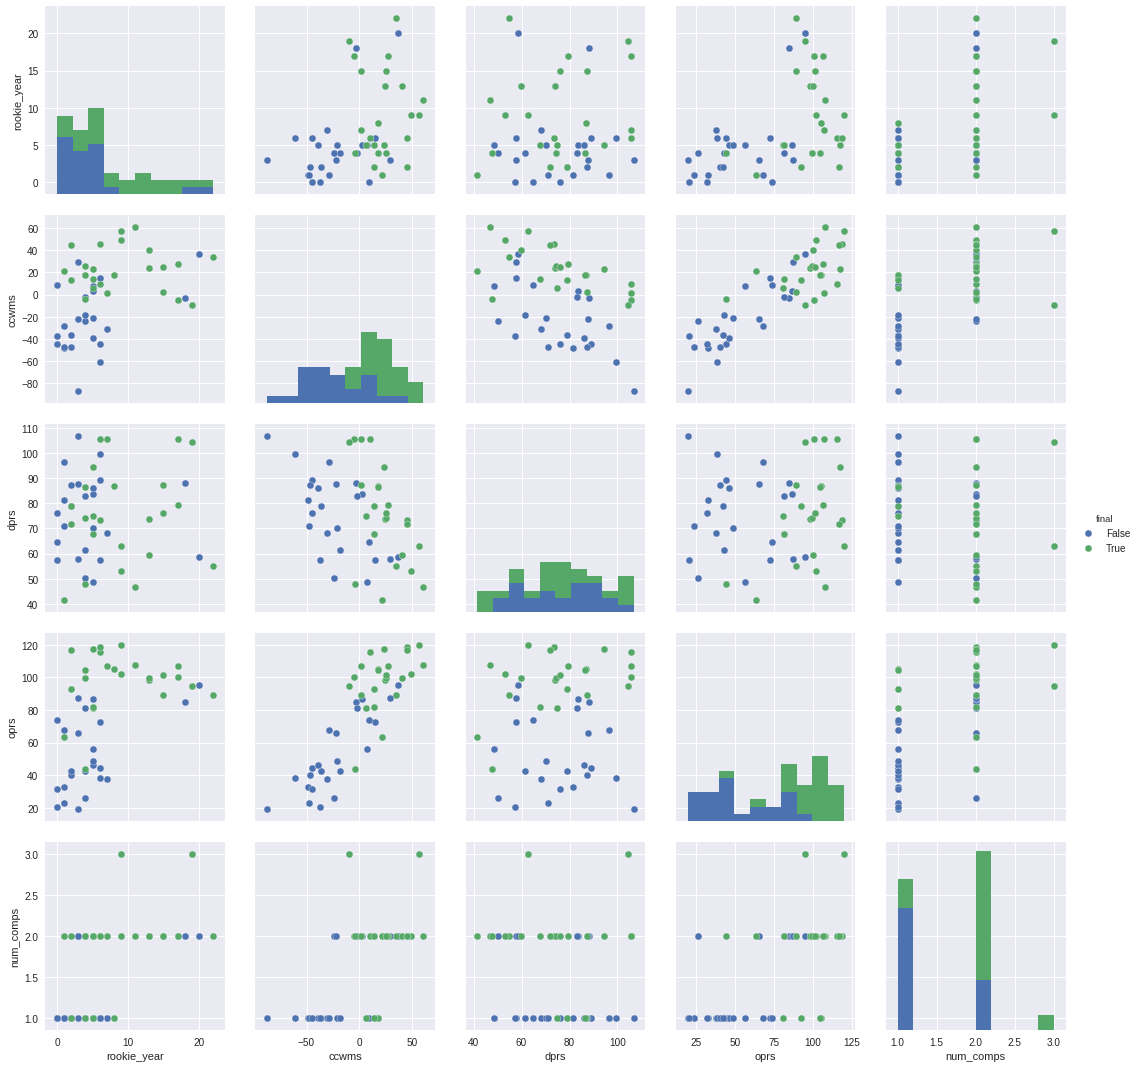

In [15]:
sns.pairplot(data, vars=['rookie_year', 'ccwms', 'dprs', 'oprs', 'num_comps'], hue='final', size=3)
plt.show()